In [3]:
import osmnx as ox
import time
from datetime import datetime

In [2]:
ox.__version__

'1.9.4'

In [5]:
#ORIGINAL CODE FROM SOPHIE - Testing on small part of auckland
def OSMDownloader(bbox:dict, filter:str='', retain_all:bool=True, simplify:bool=False, debug:bool=False, 
                    log_file:str='/Users/kad/Desktop/cyclists/Kimberley/segmentation/graph_stats.csv',
                    useful_way_tags:list=ox.settings.useful_tags_way, return_directed:bool=False):
    if debug: 
        start = time.time()

    # TEST THIS
    ox.settings.useful_tags_way = useful_way_tags
    #ox.config(useful_tags_way=useful_way_tags)
    
    # will use osm graphs for now. can be converted to gdf. retains road name
    osm_graph = ox.graph_from_bbox(north=bbox['max_y'],
        south=bbox['min_y'], east=bbox['max_x'], west=bbox['min_x'],
        custom_filter=filter, retain_all=retain_all, simplify=simplify)

    if debug:
        print(f'Downloaded OSM graph in {round(time.time() - start, 1)}s')

    # save graph info for future reference
    now = datetime.now()
    min_x, min_y, max_x, max_y, name = bbox['min_x'], bbox['min_y'], bbox['max_x'], bbox['max_y'], bbox['name']
    csv_row = (f'\n{datetime.now()},{name},{min_x},{min_y},{max_x},'
                f'{max_y},{len(osm_graph.nodes)},{len(osm_graph.edges)},')
    with open(log_file, 'a') as fd:
        fd.write(csv_row)

    # I think we always want undirected, but here just in case
    if not return_directed:
        osm_graph = ox.get_undirected(osm_graph)
    
    return osm_graph

# Example bounding box for Auckland CBD area (using your coordinates)
bbox = {
    'min_x': 174.769975,  # Minimum longitude
    'min_y': -36.856088,  # Minimum latitude
    'max_x': 174.773988,  # Maximum longitude
    'max_y': -36.850245,  # Maximum latitude
    'name': 'Auckland CBD' # Name of the area
}

# Call the OSMDownloader function
graph = OSMDownloader(
    bbox=bbox,
    filter="['highway']",  # You can adjust the filter as needed
    retain_all=True,
    simplify=True,
    debug=True,
    log_file='/Users/kad/Desktop/cyclists/Kimberley/segmentation/graph_stats.csv',
    return_directed=False
)

# Print graph statistics
print(f"Graph nodes: {len(graph.nodes)}, edges: {len(graph.edges)}")

# Save the graph to a file
ox.save_graphml(graph, filepath='/Users/kad/Desktop/cyclists/Kimberley/segmentation/osm_graph.graphml')
print("Graph saved to osm_graph.graphml")

/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/3438669985.py:13: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  osm_graph = ox.graph_from_bbox(north=bbox['max_y'],
/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/3438669985.py:13: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  osm_graph = ox.graph_from_bbox(north=bbox['max_y'],


Downloaded OSM graph in 3.9s


/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/3438669985.py:30: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  osm_graph = ox.get_undirected(osm_graph)


Graph nodes: 312, edges: 428
Graph saved to osm_graph.graphml


In [11]:
#These are the locations used for the bbox for the next part of code
#-36.837848, 174.660965 # Te atatu
#-36.846699, 174.900916 # Bucklands Beach
#-36.962126, 174.905087 #Flat Bush
#-36.968943, 174.645524 #Laingholm




In [6]:
# Making a graph for the bbox using a larger area of Auckland
bbox = {
    'min_x': 174.645524,  # Minimum longitude
    'min_y': -36.968943,  # Minimum latitude
    'max_x': 174.905087,  # Maximum longitude
    'max_y': -36.837848,  # Maximum latitude
    'name': 'Auckland' # Name of the area
}

# Call the OSMDownloader function
graph = OSMDownloader(
    bbox=bbox,
    filter="['highway']",  # You can adjust the filter as needed
    retain_all=True,
    simplify=True,
    debug=True,
    log_file='/Users/kad/Desktop/cyclists/Kimberley/segmentation/graph_stats.csv',
    return_directed=False
)

# Print graph statistics
print(f"Graph nodes: {len(graph.nodes)}, edges: {len(graph.edges)}")

# Save the graph to a file
ox.save_graphml(graph, filepath='/Users/kad/Desktop/cyclists/Kimberley/segmentation/osm_graph_Auck.graphml')
print("Graph saved to osm_graph_Auck.graphml")

/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/3438669985.py:13: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  osm_graph = ox.graph_from_bbox(north=bbox['max_y'],
/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/3438669985.py:13: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  osm_graph = ox.graph_from_bbox(north=bbox['max_y'],


Downloaded OSM graph in 153.9s


/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/3438669985.py:30: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  osm_graph = ox.get_undirected(osm_graph)


Graph nodes: 83648, edges: 115572
Graph saved to osm_graph_Auck.graphml


/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/1635567673.py:5: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north=north, south=south, east=east, west=west)
/var/folders/6b/r5wb08fs0n1ddq3n210r8zzr0000gn/T/ipykernel_32835/1635567673.py:5: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north=north, south=south, east=east, west=west)


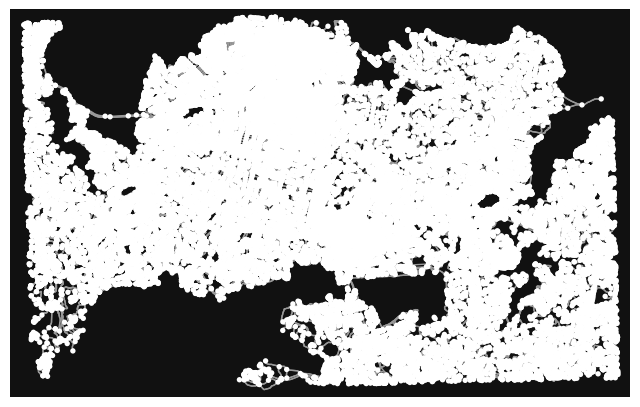

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
#Just trying to plot the graph to see what it looks like
# bbox as above
north, south, east, west = -36.837848, -36.968943, 174.905087, 174.645524

# Creating a graph, projecting it and then plotting it
graph_map = ox.graph_from_bbox(north=north, south=south, east=east, west=west)
map_projected = ox.project_graph(graph_map)
ox.plot_graph(map_projected)